In [3]:
import warnings

warnings.filterwarnings(action='ignore')
import os, sys
import pandas as pd
import numpy as np

def importOwnLib():
    if '/home/miruware/aProjects/lib' not in sys.path:
        sys.path.append('/home/miruware/aProjects/lib')
        print("lib path is successfully appended.")
    else:
        print("lib path is already exists.")
importOwnLib()
import sonyalib as sonya

import importlib
importlib.reload(sonya)


from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

lib path is already exists.


In [2]:
def confusion_metrics(conf_matrix):
    # save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1 - conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-' * 50)
    print(f'Accuracy: {round(conf_accuracy, 2)}')
    print(f'Mis-Classification: {round(conf_misclassification, 2)}')
    print(f'Sensitivity: {round(conf_sensitivity, 2)}')
    print(f'Specificity: {round(conf_specificity, 2)}')
    print(f'Precision: {round(conf_precision, 2)}')
    print(f'f_1 Score: {round(conf_f1, 2)}')

    return conf_sensitivity,  conf_specificity


In [4]:
file_path0 = './BRC_input_201116_train.xlsx'
file_path1 = './BRC_input_201116_test.xlsx'
meta_train = sonya.get_normalized_metadata(file_path0)
meta_test = sonya.get_normalized_metadata(file_path1)
# target_dir = './model/'

X_train = meta_train['cN']
y_train = meta_train['label']

X_test = meta_test['cN']
y_test = meta_test['label']

# num_features = len(properties)


radiologist
[[ 42  17]
 [107  30]]
True Positives: 30
True Negatives: 42
False Positives: 17
False Negatives: 107
--------------------------------------------------
Accuracy: 0.37
Mis-Classification: 0.63
Sensitivity: 0.22
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.33


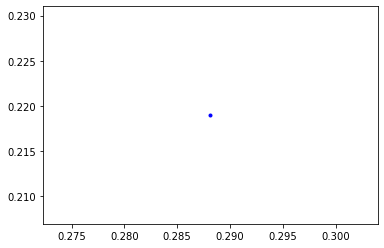

In [8]:
# ========radiologist =======
y_radio = (X_train > 0.25).astype(int)
#     y_radio = X_test['cN']

cm = confusion_matrix(y_train, y_radio)
print("radiologist")
print(cm)
sensi, speci = confusion_metrics(cm)
radio_fpr, radio_tpr, radio_thresholds = roc_curve(y_train, y_radio) # radiologist
radio_auc = auc(radio_fpr, radio_tpr)
plt.plot(1-speci, sensi, color='blue', marker='.', label='Radiologist(AUC = %0.2f)' % (radio_auc), lw=2, alpha=1)

plt.show()




In [9]:
radio_auc

0.465421254484721